<a href="https://colab.research.google.com/github/Nath188/Redes-Neuronales/blob/main/Primera_red_neuronal_con_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera red neuronal con numpy**

In [1]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

## Creando set de datos

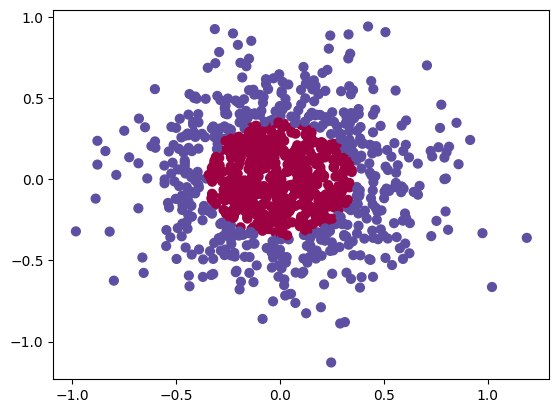

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                                             cov=0.1,
                                             n_samples=N,
                                             n_features=2,
                                             n_classes=2,
                                             shuffle=True,
                                             random_state=None)
X, Y = gaussian_quantiles
Y = Y[:,np.newaxis]
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral);

## Función de inicialización de parámetros

In [3]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

# Función de activación

In [4]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

In [5]:
x = np.linspace(10,-10,100)

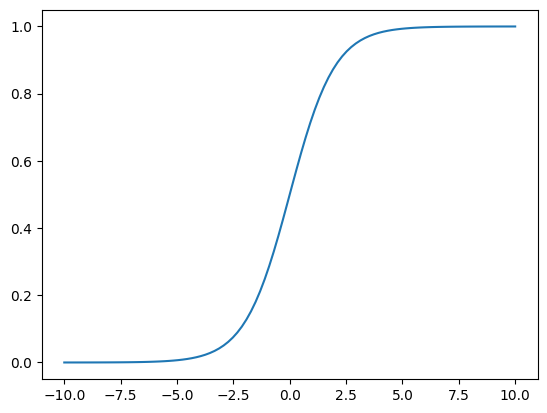

In [6]:
plt.plot(x,sigmoid(x))

## Función de pérdida

In [7]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)


In [8]:
a = np.array([[2,3],
[2,3],
[2,3]])

In [9]:
a.shape

(3, 2)

In [10]:
b = np.array([[1,6,5,2],
             [1,2,7,0]])

In [11]:
b.shape

(2, 4)

In [12]:
np.matmul(a,b)

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

In [13]:
a@b

array([[ 5, 18, 31,  4],
       [ 5, 18, 31,  4],
       [ 5, 18, 31,  4]])

## Función de entrenamiento

In [17]:
def train(X_data,lr,params,training=True):
## Forward

    params['A0'] = X_data

    params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])

    params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])

    params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
    # Backpropagation

        params['dZ3'] =  mse(Y,output,True) * sigmoid(params['A3'],True)
        params['dW3'] = np.matmul(params['A2'].T,params['dZ3'])

        params['dZ2'] = np.matmul(params['dZ3'],params['W3'].T) * relu(params['A2'],True)
        params['dW2'] = np.matmul(params['A1'].T,params['dZ2'])

        params['dZ1'] = np.matmul(params['dZ2'],params['W2'].T) * relu(params['A1'],True)
        params['dW1'] = np.matmul(params['A0'].T,params['dZ1'])


        ## Gradinet Descent:

        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - (np.mean(params['dZ3'],axis=0, keepdims=True)) * lr

        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - (np.mean(params['dZ2'],axis=0, keepdims=True)) * lr

        params['W1'] = params['W1'] -params['dW1'] * lr
        params['b1'] = params['b1'] - (np.mean(params['dZ1'],axis=0, keepdims=True)) * lr

    return output

## Entrenando la red

In [20]:
layer_dims =[2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(60000):
    output = train(X,0.001,params)
    if _ % 25 == 0:
        print(mse(Y,output))
        errors.append(mse(Y,output))


0.22906266148543056
0.19660078527014505
0.16576363966346014
0.14318321596835829
0.12443352535073708
0.10901095912226783
0.09671081876679816
0.08685506746724761
0.07885403086144033
0.0727715798516762
0.06747616492932204
0.06267192301047361
0.05875207589276201
0.05541572834189149
0.05244571891171913
0.04974534484217074
0.04698016258485047
0.0441965815530598
0.04171913082511065
0.03940797614801405
0.03716087554493399
0.035251286745579764
0.03377044245513036
0.03227512072949986
0.031088712896072786
0.030123117374337382
0.029223303593466966
0.028438256230138216
0.027766787454111493
0.027215153717689036
0.026733739575959363
0.02630830132628305
0.025908286634799348
0.025546844239415833
0.0252131340361217
0.02489312141771121
0.024601119252240306
0.02432681883969405
0.02405748790575753
0.02381644941735089
0.023589168615849226
0.02336860664230228
0.023184125476886044
0.023020536336153447
0.022860600711462026
0.022717559041099483
0.02257946029649442
0.022457245446793797
0.02236289984819914
0.0222

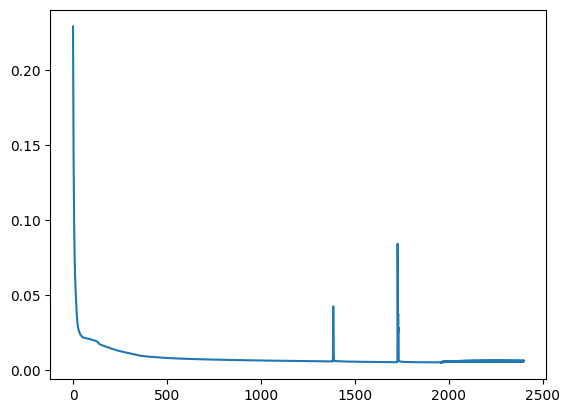

In [21]:
plt.plot(errors)

### Probando sobre datos nuevos

In [22]:
data_test = (np.random.rand(1000, 2) * 2) - 1
y = train(data_test,0.001,params,training=False)

In [23]:
y = np.where(y >= 0.5, 1, 0)

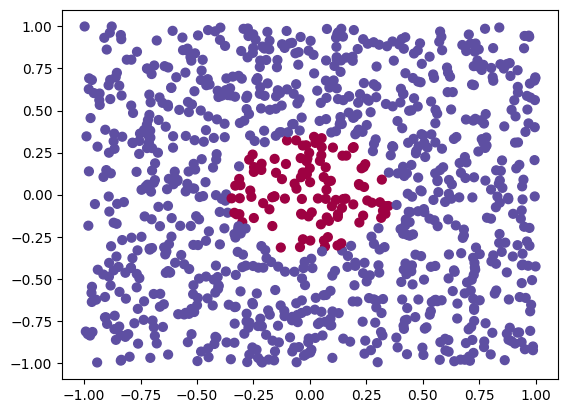

In [24]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0] ,s=40, cmap=plt.cm.Spectral);

## Malla de visualización

In [25]:
_x0 = np.linspace(-1,1,50)
_x1 = np.linspace(-1,1,50)

_y = np.zeros((50,50))

In [26]:
for i0, x0 in enumerate(_x0):
    for i1, x1 in enumerate(_x1):
        _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)

<ipython-input-26-608089885525>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _y[i0,i1] = train(np.array([[x0,x1]]),0.0001,params,training=False)


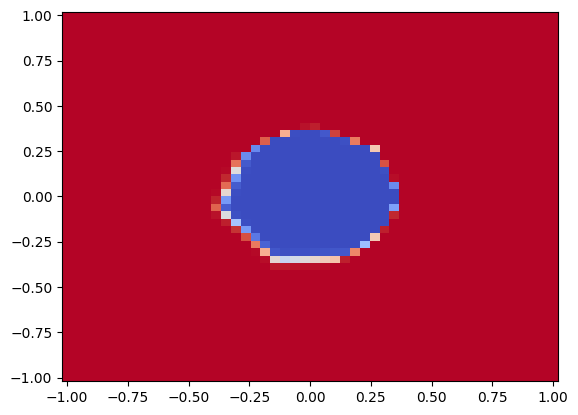

In [27]:
plt.pcolormesh(_x0,_x1,_y,cmap='coolwarm')